In [83]:
import pickle
import pprint
import glob
import pandas as pd
import seaborn as sns
import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)
pp = pprint.PrettyPrinter(depth=6)
pp = pprint.PrettyPrinter(depth=6)
pd.set_option('max_colwidth',400)
pd.set_option('max_rows',200)

In [84]:
csv_folder = "../../csv"
pkl_folder = "../../pkl"

### Import df

In [85]:
jobsDf = pd.read_csv(f"{csv_folder}/allJobs.csv", index_col=0)

In [86]:
tagsDf = pd.read_csv(f"{csv_folder}/tags_updated.csv", index_col=0)
tagsDf.Date = pd.to_datetime(tagsDf.Date)

In [87]:
tagsDf

,actual_release_date,Tag,Sha,Date,month,year,major_version,jira_version
0,NaN,4.5.6,12d931e5a31e1692a428bbb34ba11cd63aebf998,2015-10-16 09:31:18,10,2015,4,4.5.6
1,NaN,4.5.7,e2afb0bff1b8be759789d2c1bc9348de6f519f83,2016-04-08 13:44:39,4,2016,4,4.5.7
2,2015-04-23 00:00:00,5.1,4aa9af3a6a4362b61db365fba32eb0a55d411e7a,2015-04-02 08:09:45,4,2015,5,5.1
3,NaN,5.1.1,0a231d24c0f1e7ce1d200274b8e9bbe00f9f49fb,2015-06-02 08:34:06,6,2015,5,5.1.1
4,NaN,5.1.2,2a52a7106b2bfbd659c591c2d6fc09ad0ab2db5c,2015-07-27 08:03:21,7,2015,5,5.1.2
5,2015-11-26 00:00:00,5.2,f045be98be3ba032b6b19d71574038eeeb91803b,2015-11-02 08:56:19,11,2015,5,5.2
6,2016-01-28 00:00:00,5.3,8db783e62b266eeb0d0b10dc050a7ca50e96c5d1,2016-01-08 10:09:15,1,2016,5,5.3
7,2016-04-01 00:00:00,5.4,7b02df9be3cd9448699b5857586e1c6e2b28c007,2016-03-08 15:48:19,3,2016,5,5.4
8,2016-05-19 00:00:00,5.5,5773a4aab0ef6c0de79d3038e82f8a051049d6d0,2016-05-02 14:09:29,5,2016,5,5.5
9,2016-06-08 00:00:00,5.6,074f3d1169f9688d15af4aff67e7e672cbeed782,2016-06-01 11:59:09,6,2016,5,5.6


In [88]:
tagsDf_travis = tagsDf[tagsDf.Date > pd.to_datetime(datetime.date(2015,3,10))]

### Import comparisons (no RC and Milestones)

In [89]:
comp_comb_tags_df = pd.read_csv(f"{csv_folder}/comparisons_no_rc_and_milestones.csv", index_col=0)
comp_comb_tags_df

,from_tag,to_tag,ahead_by,behind_by,from_sha,to_sha
0,4.5.7,4.5.6,0,7,e2afb0bff1b8be759789d2c1bc9348de6f519f83,12d931e5a31e1692a428bbb34ba11cd63aebf998
1,5.1,4.5.6,68,2355,4aa9af3a6a4362b61db365fba32eb0a55d411e7a,12d931e5a31e1692a428bbb34ba11cd63aebf998
2,5.2,4.5.6,68,5227,f045be98be3ba032b6b19d71574038eeeb91803b,12d931e5a31e1692a428bbb34ba11cd63aebf998
3,6.1.1,4.5.6,68,8403,6a70cefe40b1b8127eb4e7ef3436a5c43fe938b4,12d931e5a31e1692a428bbb34ba11cd63aebf998
4,5.6.5,4.5.6,68,7398,29a8d73d1b3fb39fd35c777bf07be40873391517,12d931e5a31e1692a428bbb34ba11cd63aebf998
...,...,...,...,...,...,...
1818,7.9.1,8.4.2.36762,1303,18,6818fad17ba67e97d395a8488d5412e00892d5e1,2de1f343e3dbd9e88007b42e475512677c04eb8a
1819,8.3.1.34397,8.4.2.36762,251,3,b77ce511a2039330aea8832ad12e86a8cfa9ff7d,2de1f343e3dbd9e88007b42e475512677c04eb8a
1820,7.5,8.4.2.36762,2431,0,cb851ba202973bd468e070572c1e3b0b0437d2f4,2de1f343e3dbd9e88007b42e475512677c04eb8a
1821,7.6,8.4.2.36762,2188,0,c2edd480f08c8a692757df5ce6c89cddb566b666,2de1f343e3dbd9e88007b42e475512677c04eb8a


In [90]:
comp_comb_tags_df = tagsDf[["Tag", "Date"]].merge(comp_comb_tags_df, left_on="Tag", right_on="to_tag").drop(columns=["Tag"]).rename(columns={"Date": "to_date"})
compareTagsDf = tagsDf[["Tag", "Date"]].merge(comp_comb_tags_df, left_on="Tag", right_on="from_tag").drop(columns=["Tag"]).rename(columns={"Date": "from_date"})
#compareTagsDf.to_csv(f"{csv_folder}/compare_tags_sha.csv")
compareTagsDf.from_date = pd.to_datetime(compareTagsDf.from_date)
compareTagsDf.to_date = pd.to_datetime(compareTagsDf.to_date)
compareTagsDf

,from_date,to_date,from_tag,to_tag,ahead_by,behind_by,from_sha,to_sha
0,2015-10-16 09:31:18,2016-04-08 13:44:39,4.5.6,4.5.7,7,0,12d931e5a31e1692a428bbb34ba11cd63aebf998,e2afb0bff1b8be759789d2c1bc9348de6f519f83
1,2015-10-16 09:31:18,2015-04-02 08:09:45,4.5.6,5.1,2355,68,12d931e5a31e1692a428bbb34ba11cd63aebf998,4aa9af3a6a4362b61db365fba32eb0a55d411e7a
2,2015-10-16 09:31:18,2015-06-02 08:34:06,4.5.6,5.1.1,2362,68,12d931e5a31e1692a428bbb34ba11cd63aebf998,0a231d24c0f1e7ce1d200274b8e9bbe00f9f49fb
3,2015-10-16 09:31:18,2015-07-27 08:03:21,4.5.6,5.1.2,2374,68,12d931e5a31e1692a428bbb34ba11cd63aebf998,2a52a7106b2bfbd659c591c2d6fc09ad0ab2db5c
4,2015-10-16 09:31:18,2015-11-02 08:56:19,4.5.6,5.2,5227,68,12d931e5a31e1692a428bbb34ba11cd63aebf998,f045be98be3ba032b6b19d71574038eeeb91803b
...,...,...,...,...,...,...,...,...
1818,2020-08-27 14:11:31,2020-02-25 14:32:24,8.4.2.36762,8.2.0.32929,0,431,2de1f343e3dbd9e88007b42e475512677c04eb8a,749367809478e5b7f60c6ef952436db9789b5882
1819,2020-08-27 14:11:31,2020-04-28 13:54:13,8.4.2.36762,8.3.0.34182,0,251,2de1f343e3dbd9e88007b42e475512677c04eb8a,9c58e36328ae79ad3c36c13aa253879351ce3613
1820,2020-08-27 14:11:31,2020-05-07 12:09:22,8.4.2.36762,8.3.1.34397,3,251,2de1f343e3dbd9e88007b42e475512677c04eb8a,b77ce511a2039330aea8832ad12e86a8cfa9ff7d
1821,2020-08-27 14:11:31,2020-07-03 07:09:27,8.4.2.36762,8.4.0.35506,0,10,2de1f343e3dbd9e88007b42e475512677c04eb8a,74b4533439f380827d68e8c01667eeaecad89fc7


In [91]:
grp = compareTagsDf[(compareTagsDf.behind_by == 0)].groupby("to_tag").idxmin()
tags_final = compareTagsDf.loc[grp.ahead_by].sort_values(by="from_tag")
tags_final

,from_date,to_date,from_tag,to_tag,ahead_by,behind_by,from_sha,to_sha
0,2015-10-16 09:31:18,2016-04-08 13:44:39,4.5.6,4.5.7,7,0,12d931e5a31e1692a428bbb34ba11cd63aebf998,e2afb0bff1b8be759789d2c1bc9348de6f519f83
43,2015-04-02 08:09:45,2015-06-02 08:34:06,5.1,5.1.1,7,0,4aa9af3a6a4362b61db365fba32eb0a55d411e7a,0a231d24c0f1e7ce1d200274b8e9bbe00f9f49fb
66,2015-06-02 08:34:06,2015-07-27 08:03:21,5.1.1,5.1.2,12,0,0a231d24c0f1e7ce1d200274b8e9bbe00f9f49fb,2a52a7106b2bfbd659c591c2d6fc09ad0ab2db5c
90,2015-07-27 08:03:21,2015-11-02 08:56:19,5.1.2,5.2,2853,0,2a52a7106b2bfbd659c591c2d6fc09ad0ab2db5c,f045be98be3ba032b6b19d71574038eeeb91803b
115,2015-11-02 08:56:19,2016-01-08 10:09:15,5.2,5.3,561,0,f045be98be3ba032b6b19d71574038eeeb91803b,8db783e62b266eeb0d0b10dc050a7ca50e96c5d1
141,2016-01-08 10:09:15,2016-03-08 15:48:19,5.3,5.4,438,0,8db783e62b266eeb0d0b10dc050a7ca50e96c5d1,7b02df9be3cd9448699b5857586e1c6e2b28c007
168,2016-03-08 15:48:19,2016-05-02 14:09:29,5.4,5.5,725,0,7b02df9be3cd9448699b5857586e1c6e2b28c007,5773a4aab0ef6c0de79d3038e82f8a051049d6d0
196,2016-05-02 14:09:29,2016-06-01 11:59:09,5.5,5.6,349,0,5773a4aab0ef6c0de79d3038e82f8a051049d6d0,074f3d1169f9688d15af4aff67e7e672cbeed782
225,2016-06-01 11:59:09,2016-07-25 08:13:12,5.6,5.6.1,32,0,074f3d1169f9688d15af4aff67e7e672cbeed782,4f37a3f3b40da4bba953d1ed9a2b0d114869a8ad
255,2016-07-25 08:13:12,2016-09-19 14:34:40,5.6.1,5.6.2,25,0,4f37a3f3b40da4bba953d1ed9a2b0d114869a8ad,9c1c190107023ffca5f67d6d0184ff5371c5347f


**Any version missing?**

In [92]:
set(tags_final.to_tag.unique()).difference(set(compareTagsDf.to_tag))

set()

In [93]:
x = compareTagsDf[(compareTagsDf.behind_by < 3) & (compareTagsDf.ahead_by > 0)]
x["ahead_behind_sum"] = x.apply(lambda row: row.ahead_by + row.behind_by,axis=1)
tags_final = x.loc[x.groupby("to_tag").ahead_behind_sum.idxmin()].sort_values(by="from_tag")
tags_final

<ipython-input-93-daec223e8f84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["ahead_behind_sum"] = x.apply(lambda row: row.ahead_by + row.behind_by,axis=1)


,from_date,to_date,from_tag,to_tag,ahead_by,behind_by,from_sha,to_sha,ahead_behind_sum
0,2015-10-16 09:31:18,2016-04-08 13:44:39,4.5.6,4.5.7,7,0,12d931e5a31e1692a428bbb34ba11cd63aebf998,e2afb0bff1b8be759789d2c1bc9348de6f519f83,7
43,2015-04-02 08:09:45,2015-06-02 08:34:06,5.1,5.1.1,7,0,4aa9af3a6a4362b61db365fba32eb0a55d411e7a,0a231d24c0f1e7ce1d200274b8e9bbe00f9f49fb,7
66,2015-06-02 08:34:06,2015-07-27 08:03:21,5.1.1,5.1.2,12,0,0a231d24c0f1e7ce1d200274b8e9bbe00f9f49fb,2a52a7106b2bfbd659c591c2d6fc09ad0ab2db5c,12
90,2015-07-27 08:03:21,2015-11-02 08:56:19,5.1.2,5.2,2853,0,2a52a7106b2bfbd659c591c2d6fc09ad0ab2db5c,f045be98be3ba032b6b19d71574038eeeb91803b,2853
115,2015-11-02 08:56:19,2016-01-08 10:09:15,5.2,5.3,561,0,f045be98be3ba032b6b19d71574038eeeb91803b,8db783e62b266eeb0d0b10dc050a7ca50e96c5d1,561
141,2016-01-08 10:09:15,2016-03-08 15:48:19,5.3,5.4,438,0,8db783e62b266eeb0d0b10dc050a7ca50e96c5d1,7b02df9be3cd9448699b5857586e1c6e2b28c007,438
168,2016-03-08 15:48:19,2016-05-02 14:09:29,5.4,5.5,725,0,7b02df9be3cd9448699b5857586e1c6e2b28c007,5773a4aab0ef6c0de79d3038e82f8a051049d6d0,725
196,2016-05-02 14:09:29,2016-06-01 11:59:09,5.5,5.6,349,0,5773a4aab0ef6c0de79d3038e82f8a051049d6d0,074f3d1169f9688d15af4aff67e7e672cbeed782,349
225,2016-06-01 11:59:09,2016-07-25 08:13:12,5.6,5.6.1,32,0,074f3d1169f9688d15af4aff67e7e672cbeed782,4f37a3f3b40da4bba953d1ed9a2b0d114869a8ad,32
255,2016-07-25 08:13:12,2016-09-19 14:34:40,5.6.1,5.6.2,25,0,4f37a3f3b40da4bba953d1ed9a2b0d114869a8ad,9c1c190107023ffca5f67d6d0184ff5371c5347f,25


The improved mappings

In [94]:
tags_final[tags_final.behind_by > 0]

,from_date,to_date,from_tag,to_tag,ahead_by,behind_by,from_sha,to_sha,ahead_behind_sum
1521,2019-07-01 07:56:26,2019-10-15 08:15:12,7.9,8.0,415,1,6502ec4ffee7e5a57498baaf330b80eb490d01c2,87ca68d63f4afd37d74b2f454430dfde9e862c6a,416
1688,2019-12-17 12:29:34,2020-02-25 14:32:24,8.1.0.31237,8.2.0.32929,262,1,65a7a7c34de5bff9aed7c3e58eb6dcc87ae34b57,749367809478e5b7f60c6ef952436db9789b5882,263


In [95]:
set(tagsDf_travis.Tag.unique()) - set(tags_final.to_tag.unique())

{'4.5.6', '5.1'}

### Analysis

**Ahead by distribution**

<AxesSubplot:xlabel='ahead_by'>

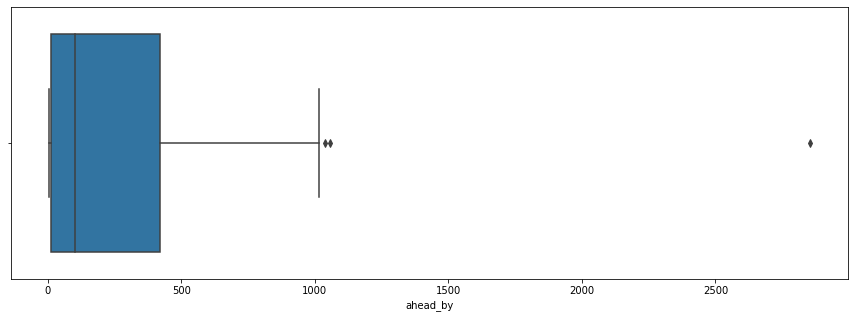

In [96]:
sns.boxplot(x=tags_final.ahead_by)

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ahead_by', ylabel='Density'>

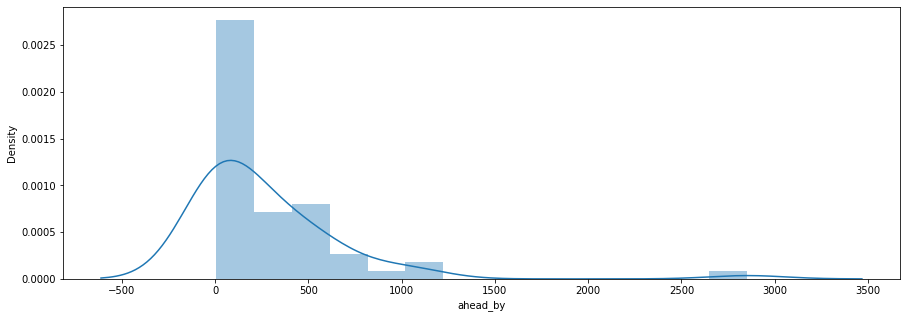

In [97]:
sns.distplot(tags_final.ahead_by)

In [98]:
tags_final.sort_values(by="ahead_by", ascending=False).head(5)

,from_date,to_date,from_tag,to_tag,ahead_by,behind_by,from_sha,to_sha,ahead_behind_sum
90,2015-07-27 08:03:21,2015-11-02 08:56:19,5.1.2,5.2,2853,0,2a52a7106b2bfbd659c591c2d6fc09ad0ab2db5c,f045be98be3ba032b6b19d71574038eeeb91803b,2853
804,2017-08-01 11:58:54,2017-10-20 12:09:25,6.5,6.6,1055,0,ef2ca5b33e5795b841d45e0b20fef3cb90391719,353296630a2d150f48c76183e82188dfcaa42df0,1055
726,2017-04-24 08:51:14,2017-06-02 08:32:25,6.3.2,6.4,1036,0,84ad17dd4e53eae1221d1af96fb45d8997f2e2fa,ad64a17b531c0e1f6fef0ce7e4d0d0b060977754,1036
609,2016-12-13 15:05:23,2017-03-14 09:12:39,6.2,6.3,1015,0,4a28f29f95254b58f3cf0a0871bc632e998403f5,43ea4f4c43aa89d4c435017f86d0da254e115e6b,1015
168,2016-03-08 15:48:19,2016-05-02 14:09:29,5.4,5.5,725,0,7b02df9be3cd9448699b5857586e1c6e2b28c007,5773a4aab0ef6c0de79d3038e82f8a051049d6d0,725


In [99]:
tags_final.sort_values(by="ahead_by").head(5)

,from_date,to_date,from_tag,to_tag,ahead_by,behind_by,from_sha,to_sha,ahead_behind_sum
1737,2020-04-28 13:54:13,2020-05-07 12:09:22,8.3.0.34182,8.3.1.34397,3,0,9c58e36328ae79ad3c36c13aa253879351ce3613,b77ce511a2039330aea8832ad12e86a8cfa9ff7d,3
385,2017-01-18 16:19:42,2017-02-16 20:34:26,5.6.5,5.6.6,3,0,29a8d73d1b3fb39fd35c777bf07be40873391517,05221592672b903c703c0424dc77458e615c106d,3
1803,2020-07-14 08:13:18,2020-08-27 14:11:31,8.4.1.35646,8.4.2.36762,4,0,a0d372f704998d38856c26e28662fd7de062f873,2de1f343e3dbd9e88007b42e475512677c04eb8a,4
531,2016-10-11 07:02:29,2016-11-17 19:45:38,6.1,6.1.1,4,0,442f1a11b2365618f58f3f456a756995a6318225,6a70cefe40b1b8127eb4e7ef3436a5c43fe938b4,4
1782,2020-07-03 07:09:27,2020-07-14 08:13:18,8.4.0.35506,8.4.1.35646,6,0,74b4533439f380827d68e8c01667eeaecad89fc7,a0d372f704998d38856c26e28662fd7de062f873,6


**Difference in days**

In [100]:
tags_final.to_date = pd.to_datetime(tags_final.to_date)
tags_final.from_date = pd.to_datetime(tags_final.from_date)
tags_final["diff_dates"] = tags_final.to_date - tags_final.from_date
tags_final["diff_days"] = tags_final.diff_dates / np.timedelta64(1, "D")

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='diff_days', ylabel='Density'>

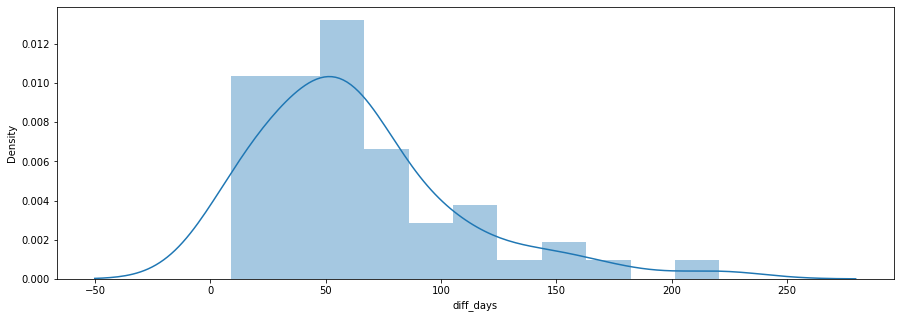

In [101]:
sns.distplot(tags_final.diff_days)

In [102]:
tags_final.sort_values(by = "diff_days", ascending=False)

,from_date,to_date,from_tag,to_tag,ahead_by,behind_by,from_sha,to_sha,ahead_behind_sum,diff_dates,diff_days
420,2017-02-16 20:34:26,2017-09-25 10:46:49,5.6.6,5.6.7,10,0,05221592672b903c703c0424dc77458e615c106d,3de1bdeb3255fedc75885313205143f28aa89e9c,10,220 days 14:12:23,220.591933
0,2015-10-16 09:31:18,2016-04-08 13:44:39,4.5.6,4.5.7,7,0,12d931e5a31e1692a428bbb34ba11cd63aebf998,e2afb0bff1b8be759789d2c1bc9348de6f519f83,7,175 days 04:13:21,175.175938
1548,2019-07-10 12:20:33,2019-12-09 13:03:50,7.9.1,7.9.2,19,0,6818fad17ba67e97d395a8488d5412e00892d5e1,5832fefc31f5ba25f15b3fa66ed816f7b87fd835,19,152 days 00:43:17,152.030058
1116,2018-11-19 15:51:14,2019-04-16 15:38:04,6.7.6,6.7.7,12,0,302f75de1ec5df6e983970f3c76b86ee02b1cd26,4aa6d928f960303eb990d50c275513a517c85e69,12,147 days 23:46:50,147.990856
1347,2018-08-03 20:21:25,2018-12-18 09:56:40,7.4,7.5,657,0,86937350807da2beb38dcd4216eafea0009fb99f,cb851ba202973bd468e070572c1e3b0b0437d2f4,657,136 days 13:35:15,136.566146
1607,2020-03-24 07:49:27,2020-07-23 14:40:10,7.9.3,7.9.4,14,0,898a79cc7df01a9603c17f92b93e46ec62bc77d2,2f8d99a55899105cbf3e3170194c614c2a6ea4d7,14,121 days 06:50:43,121.285220
1521,2019-07-01 07:56:26,2019-10-15 08:15:12,7.9,8.0,415,1,6502ec4ffee7e5a57498baaf330b80eb490d01c2,87ca68d63f4afd37d74b2f454430dfde9e862c6a,416,106 days 00:18:46,106.013032
1578,2019-12-09 13:03:50,2020-03-24 07:49:27,7.9.2,7.9.3,11,0,5832fefc31f5ba25f15b3fa66ed816f7b87fd835,898a79cc7df01a9603c17f92b93e46ec62bc77d2,11,105 days 18:45:37,105.781678
1077,2018-08-06 10:17:09,2018-11-19 15:51:14,6.7.5,6.7.6,16,0,ec8ab77fa180a9edaf664075e8e76ae0b4a2d9f1,302f75de1ec5df6e983970f3c76b86ee02b1cd26,16,105 days 05:34:05,105.232002
90,2015-07-27 08:03:21,2015-11-02 08:56:19,5.1.2,5.2,2853,0,2a52a7106b2bfbd659c591c2d6fc09ad0ab2db5c,f045be98be3ba032b6b19d71574038eeeb91803b,2853,98 days 00:52:58,98.036782


In [103]:
tags_final.sort_values(by = "diff_days", ascending=False).tail()

,from_date,to_date,from_tag,to_tag,ahead_by,behind_by,from_sha,to_sha,ahead_behind_sum,diff_dates,diff_days
687,2017-04-11 12:44:29,2017-04-24 08:51:14,6.3.1,6.3.2,7,0,54be39f47d188340b14d4d9236bbf3d43b1db2ae,84ad17dd4e53eae1221d1af96fb45d8997f2e2fa,7,12 days 20:06:45,12.838021
1782,2020-07-03 07:09:27,2020-07-14 08:13:18,8.4.0.35506,8.4.1.35646,6,0,74b4533439f380827d68e8c01667eeaecad89fc7,a0d372f704998d38856c26e28662fd7de062f873,6,11 days 01:03:51,11.044340
1517,2019-07-01 07:56:26,2019-07-10 12:20:33,7.9,7.9.1,17,0,6502ec4ffee7e5a57498baaf330b80eb490d01c2,6818fad17ba67e97d395a8488d5412e00892d5e1,17,9 days 04:24:07,9.183414
261,2016-07-25 08:13:12,2016-08-03 09:19:42,5.6.1,6.0,475,0,4f37a3f3b40da4bba953d1ed9a2b0d114869a8ad,8fd98eebd4c693bedae9c2ce45d6edc9ff2830fa,475,9 days 01:06:30,9.046181
1737,2020-04-28 13:54:13,2020-05-07 12:09:22,8.3.0.34182,8.3.1.34397,3,0,9c58e36328ae79ad3c36c13aa253879351ce3613,b77ce511a2039330aea8832ad12e86a8cfa9ff7d,3,8 days 22:15:09,8.927188


In [104]:
len(tags_final)

55

In [105]:
import git
git = git.Git("../../../sonarqube/") 

In [106]:
def retrieve_date_for_sha(sha):
    lines = git.show("--pretty=fuller", sha, "--date=format:'%Y-%m-%d %H:%M:%S'").split("\n")
    for line in lines:
        if "CommitDate" in line:
            commit_date = line
            st = commit_date.split(": ")[1]
            return st[st.find("'")+1:st.find("''")]
    return None

In [107]:
tags_final["from_date_new"] = tags_final.from_sha.apply(retrieve_date_for_sha)
tags_final["to_date_new"] = tags_final.to_sha.apply(retrieve_date_for_sha)
tags_final.from_date_new = pd.to_datetime(tags_final.from_date_new)
tags_final.to_date_new = pd.to_datetime(tags_final.to_date_new)

In [108]:
tags_final = tags_final.rename(columns={
    "from_date":"from_author_date",
    "to_date":"to_author_date",
    "from_date_new":"from_commit_date",
    "to_date_new":"to_commit_date",
    "diff_dates":"diff_author_dates",
    "diff_days":"diff_author_days",
})

In [109]:
tags_final["diff_commit_dates"] = tags_final.to_commit_date - tags_final.from_commit_date
tags_final["diff_commit_days"] = tags_final.diff_commit_dates / np.timedelta64(1, "D")

**Merge with jira version**

In [110]:
tags_final.columns

Index(['from_author_date', 'to_author_date', 'from_tag', 'to_tag', 'ahead_by',
       'behind_by', 'from_sha', 'to_sha', 'ahead_behind_sum',
       'diff_author_dates', 'diff_author_days', 'from_commit_date',
       'to_commit_date', 'diff_commit_dates', 'diff_commit_days'],
      dtype='object')

In [111]:
tags = tagsDf
#Replace git tag with jira versions so that it matches the format of the other datasets
tags_final = tags_final.merge(tags[["Tag","jira_version"]], left_on="to_tag", right_on="Tag")\
.drop(columns=["to_tag", "Tag"]).rename(columns={"jira_version":"to_tag"})
tags_final = tags_final.merge(tags[["Tag","jira_version"]], left_on="from_tag", right_on="Tag")\
.drop(columns=["from_tag", "Tag"]).rename(columns={"jira_version":"from_tag"})
tags_final

,from_author_date,to_author_date,ahead_by,behind_by,from_sha,to_sha,ahead_behind_sum,diff_author_dates,diff_author_days,from_commit_date,to_commit_date,diff_commit_dates,diff_commit_days,to_tag,from_tag
0,2015-10-16 09:31:18,2016-04-08 13:44:39,7,0,12d931e5a31e1692a428bbb34ba11cd63aebf998,e2afb0bff1b8be759789d2c1bc9348de6f519f83,7,175 days 04:13:21,175.175938,2015-10-16 11:31:18,2016-04-08 15:44:39,175 days 04:13:21,175.175938,4.5.7,4.5.6
1,2015-04-02 08:09:45,2015-06-02 08:34:06,7,0,4aa9af3a6a4362b61db365fba32eb0a55d411e7a,0a231d24c0f1e7ce1d200274b8e9bbe00f9f49fb,7,61 days 00:24:21,61.016910,2015-04-02 10:09:45,2015-06-02 10:34:06,61 days 00:24:21,61.016910,5.1.1,5.1
2,2015-06-02 08:34:06,2015-07-27 08:03:21,12,0,0a231d24c0f1e7ce1d200274b8e9bbe00f9f49fb,2a52a7106b2bfbd659c591c2d6fc09ad0ab2db5c,12,54 days 23:29:15,54.978646,2015-06-02 10:34:06,2015-07-27 10:03:21,54 days 23:29:15,54.978646,5.1.2,5.1.1
3,2015-07-27 08:03:21,2015-11-02 08:56:19,2853,0,2a52a7106b2bfbd659c591c2d6fc09ad0ab2db5c,f045be98be3ba032b6b19d71574038eeeb91803b,2853,98 days 00:52:58,98.036782,2015-07-27 10:03:21,2015-11-02 09:56:19,97 days 23:52:58,97.995116,5.2,5.1.2
4,2015-11-02 08:56:19,2016-01-08 10:09:15,561,0,f045be98be3ba032b6b19d71574038eeeb91803b,8db783e62b266eeb0d0b10dc050a7ca50e96c5d1,561,67 days 01:12:56,67.050648,2015-11-02 09:56:19,2016-01-08 11:09:15,67 days 01:12:56,67.050648,5.3,5.2
5,2016-01-08 10:09:15,2016-03-08 15:48:19,438,0,8db783e62b266eeb0d0b10dc050a7ca50e96c5d1,7b02df9be3cd9448699b5857586e1c6e2b28c007,438,60 days 05:39:04,60.235463,2016-01-08 11:09:15,2016-03-08 16:48:19,60 days 05:39:04,60.235463,5.4,5.3
6,2016-03-08 15:48:19,2016-05-02 14:09:29,725,0,7b02df9be3cd9448699b5857586e1c6e2b28c007,5773a4aab0ef6c0de79d3038e82f8a051049d6d0,725,54 days 22:21:10,54.931366,2016-03-08 16:48:19,2016-05-02 16:09:29,54 days 23:21:10,54.973032,5.5,5.4
7,2016-05-02 14:09:29,2016-06-01 11:59:09,349,0,5773a4aab0ef6c0de79d3038e82f8a051049d6d0,074f3d1169f9688d15af4aff67e7e672cbeed782,349,29 days 21:49:40,29.909491,2016-05-02 16:09:29,2016-06-01 13:59:09,29 days 21:49:40,29.909491,5.6,5.5
8,2016-06-01 11:59:09,2016-07-25 08:13:12,32,0,074f3d1169f9688d15af4aff67e7e672cbeed782,4f37a3f3b40da4bba953d1ed9a2b0d114869a8ad,32,53 days 20:14:03,53.843090,2016-06-01 13:59:09,2016-07-25 10:13:12,53 days 20:14:03,53.843090,5.6.1,5.6
9,2016-07-25 08:13:12,2016-09-19 14:34:40,25,0,4f37a3f3b40da4bba953d1ed9a2b0d114869a8ad,9c1c190107023ffca5f67d6d0184ff5371c5347f,25,56 days 06:21:28,56.264907,2016-07-25 10:13:12,2016-09-19 16:34:40,56 days 06:21:28,56.264907,5.6.2,5.6.1


### Export to csv

In [112]:
tags_final.to_csv(f"{csv_folder}/tags_comparison_final_updated_no_rc_and_milestones.csv")
tags_final = pd.read_csv(f"{csv_folder}/tags_comparison_final_updated_no_rc_and_milestones.csv", index_col=0)
tags_final

,from_author_date,to_author_date,ahead_by,behind_by,from_sha,to_sha,ahead_behind_sum,diff_author_dates,diff_author_days,from_commit_date,to_commit_date,diff_commit_dates,diff_commit_days,to_tag,from_tag
0,2015-10-16 09:31:18,2016-04-08 13:44:39,7,0,12d931e5a31e1692a428bbb34ba11cd63aebf998,e2afb0bff1b8be759789d2c1bc9348de6f519f83,7,175 days 04:13:21,175.175938,2015-10-16 11:31:18,2016-04-08 15:44:39,175 days 04:13:21,175.175938,4.5.7,4.5.6
1,2015-04-02 08:09:45,2015-06-02 08:34:06,7,0,4aa9af3a6a4362b61db365fba32eb0a55d411e7a,0a231d24c0f1e7ce1d200274b8e9bbe00f9f49fb,7,61 days 00:24:21,61.016910,2015-04-02 10:09:45,2015-06-02 10:34:06,61 days 00:24:21,61.016910,5.1.1,5.1
2,2015-06-02 08:34:06,2015-07-27 08:03:21,12,0,0a231d24c0f1e7ce1d200274b8e9bbe00f9f49fb,2a52a7106b2bfbd659c591c2d6fc09ad0ab2db5c,12,54 days 23:29:15,54.978646,2015-06-02 10:34:06,2015-07-27 10:03:21,54 days 23:29:15,54.978646,5.1.2,5.1.1
3,2015-07-27 08:03:21,2015-11-02 08:56:19,2853,0,2a52a7106b2bfbd659c591c2d6fc09ad0ab2db5c,f045be98be3ba032b6b19d71574038eeeb91803b,2853,98 days 00:52:58,98.036782,2015-07-27 10:03:21,2015-11-02 09:56:19,97 days 23:52:58,97.995116,5.2,5.1.2
4,2015-11-02 08:56:19,2016-01-08 10:09:15,561,0,f045be98be3ba032b6b19d71574038eeeb91803b,8db783e62b266eeb0d0b10dc050a7ca50e96c5d1,561,67 days 01:12:56,67.050648,2015-11-02 09:56:19,2016-01-08 11:09:15,67 days 01:12:56,67.050648,5.3,5.2
5,2016-01-08 10:09:15,2016-03-08 15:48:19,438,0,8db783e62b266eeb0d0b10dc050a7ca50e96c5d1,7b02df9be3cd9448699b5857586e1c6e2b28c007,438,60 days 05:39:04,60.235463,2016-01-08 11:09:15,2016-03-08 16:48:19,60 days 05:39:04,60.235463,5.4,5.3
6,2016-03-08 15:48:19,2016-05-02 14:09:29,725,0,7b02df9be3cd9448699b5857586e1c6e2b28c007,5773a4aab0ef6c0de79d3038e82f8a051049d6d0,725,54 days 22:21:10,54.931366,2016-03-08 16:48:19,2016-05-02 16:09:29,54 days 23:21:10,54.973032,5.5,5.4
7,2016-05-02 14:09:29,2016-06-01 11:59:09,349,0,5773a4aab0ef6c0de79d3038e82f8a051049d6d0,074f3d1169f9688d15af4aff67e7e672cbeed782,349,29 days 21:49:40,29.909491,2016-05-02 16:09:29,2016-06-01 13:59:09,29 days 21:49:40,29.909491,5.6,5.5
8,2016-06-01 11:59:09,2016-07-25 08:13:12,32,0,074f3d1169f9688d15af4aff67e7e672cbeed782,4f37a3f3b40da4bba953d1ed9a2b0d114869a8ad,32,53 days 20:14:03,53.843090,2016-06-01 13:59:09,2016-07-25 10:13:12,53 days 20:14:03,53.843090,5.6.1,5.6
9,2016-07-25 08:13:12,2016-09-19 14:34:40,25,0,4f37a3f3b40da4bba953d1ed9a2b0d114869a8ad,9c1c190107023ffca5f67d6d0184ff5371c5347f,25,56 days 06:21:28,56.264907,2016-07-25 10:13:12,2016-09-19 16:34:40,56 days 06:21:28,56.264907,5.6.2,5.6.1


### Commits difference between tags

In [113]:
tags_comparison_shas = {}
for i, row in tags_final.iterrows():
    shas = []
    for commit in git.log("--pretty=oneline", "--right-only", f"{row.from_sha}...{row.to_sha}").split("\n"):
        sha = commit.split(" ")[0]
        shas.append(sha)
    if(len(shas) != (row.ahead_by)):
        print(f"{row.from_tag}...{row.to_tag} Mismatch in commits retrieved and ahead_by! {len(shas)} and {row.ahead_by}")
        print(shas)
        break
    tags_comparison_shas[f"{row.from_tag}...{row.to_tag}"] = shas

In [115]:
data = []
for key in tags_comparison_shas:
    from_tag = key.split("...")[0]
    to_tag = key.split("...")[1]
    for commit in tags_comparison_shas[key]:
        data.append((from_tag, to_tag, commit))
tags_comparison_commits = pd.DataFrame(data, columns=["from_tag", "to_tag", "ahead_sha"])
tags_comparison_commits.to_csv(f"{csv_folder}/tags_comparison_commits_no_rc_and_milestones.csv")
tags_comparison_commits

,from_tag,to_tag,ahead_sha
0,4.5.6,4.5.7,e2afb0bff1b8be759789d2c1bc9348de6f519f83
1,4.5.6,4.5.7,8cd20603bdbff2d725a3ba981839120b8d40faac
2,4.5.6,4.5.7,d0d9715a973793e5c8fc0ada606f70ffc7f08bf7
3,4.5.6,4.5.7,36d9a7959a95cbe44550e2c7790bf68d4c1066c8
4,4.5.6,4.5.7,75d7c7ff807aa0c081935fe8c93095277e6fe497
...,...,...,...
15600,8.4,8.4.1,08e36b12704d8ac30f56d3d5ecf73d5457424b5c
15601,8.4.1,8.4.2,2de1f343e3dbd9e88007b42e475512677c04eb8a
15602,8.4.1,8.4.2,ed1a72601c559e86ccd96004c99157421b6bcb20
15603,8.4.1,8.4.2,7721c3eeab3202e91fb9c87dfaec4ba3a7b4d0df
